# **Project Name**    - Flight Price Prediction Model



##### **Project Type**    - Productionization of ML Systems
##### **Contribution**    - Individual
##### **Team Member 1 -** Rajesh Kumar Patel

## **GitHub Link -** https://github.com/Rajesh1505/Capstone_Project_Productionization_of_ML_Systems.git

# Project Title:
**Voyage Analytics: Integrating MLOps in Travel
Productionization of ML Systems**



## Business Context

In the realm of travel and tourism, the intersection of data analytics and machine learning presents an opportunity to revolutionize the way travel experiences are curated and delivered. This capstone project revolves around a trio of datasets - users, flights, and hotels - each providing a unique perspective on travel patterns and preferences. The goal is to leverage these datasets to build and deploy sophisticated machine learning models, serving a dual purpose: enhancing predictive capabilities in travel-related decision-making and mastering the art of MLOps through hands-on application.

## Brief overview of each datasets
#### **Users Dataset:**
- code: User identifier.
- company: Associated company.
- name: Name of the user.
- gender: Gender of the user.
- age: Age of the user.

#### **Flights Dataset:**
- travelCode: Identifier for the travel.
- userCode: User identifier(linked to the Users dataset)
- from: Origin of the flight.
- to: Destination of the flight.
- flightType: Type of flight (e.g., first class).
- price: Price of the flight.
- time: Flight duration.
- distance: Distance of the flight.
- agency: Flight agency.
- date: Date of the flight.

#### **Hotels Dataset:**
- travelCode: Identifier for the travel, similar to the Flights dataset.
- userCode: User identifier(linked to the Users dataset)
- name: Name of the hotel.
- place: Location of the hotel.
- days: Number of days of the hotel stay.
- price: Price per day.
- total: Total price for the stay.
- date: Date of the hotel booking.

## Project Objectives
Build a regression model to predict the price of a flight using the flights.csv dataset. Focus on feature selection, model training, and validation to ensure accuracy and reliability.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/AB/spec/M1/project/"

!unzip "/content/drive/MyDrive/Colab Notebooks/AB/spec/M1/project/travel_capstone.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/AB/spec/M1/project/travel_capstone.zip
  inflating: flights.csv             
  inflating: hotels.csv              
  inflating: users.csv               


In [3]:
# Load Dataset
flights_dataset = pd.read_csv("/content/flights.csv", parse_dates=['date'])

### Dataset First View

In [4]:
# Dataset First Look
flights_dataset.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2019-10-04
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10


In [5]:
flights_dataset.tail()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
271883,135941,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,2020-07-12
271884,135942,1339,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,2020-07-16
271885,135942,1339,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,2020-07-20
271886,135943,1339,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62,1.21,466.30,CloudFy,2020-07-23
271887,135943,1339,Rio de Janeiro (RJ),Florianopolis (SC),economic,533.69,1.21,466.30,CloudFy,2020-07-26


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f"Total number of rows: {flights_dataset.shape[0]}")
print(f"Total number of columns: {flights_dataset.shape[1]}")

Total number of rows: 271888
Total number of columns: 10


### Dataset Information

In [7]:
# Dataset Info
flights_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   travelCode  271888 non-null  int64         
 1   userCode    271888 non-null  int64         
 2   from        271888 non-null  object        
 3   to          271888 non-null  object        
 4   flightType  271888 non-null  object        
 5   price       271888 non-null  float64       
 6   time        271888 non-null  float64       
 7   distance    271888 non-null  float64       
 8   agency      271888 non-null  object        
 9   date        271888 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 20.7+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
flights_dataset.duplicated().value_counts()

,count
False,271888


In this dataset not present any duplicate row.


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
flights_dataset.isna().sum()

,0
travelCode,0
userCode,0
from,0
to,0
flightType,0
price,0
time,0
distance,0
agency,0
date,0


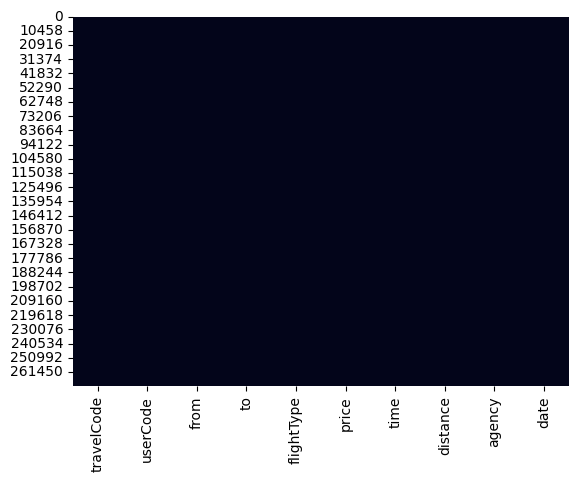

In [10]:
# Visualizing the missing values
sns.heatmap(flights_dataset.isna(), cbar=False)
plt.show()

### What did you know about your dataset?

This dataset contains no duplicate rows and no missing values.  

**Dataset Summary:**  
- **Total Rows:** 271,888  
- **Total Columns:** 10  

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
print(f"Dataset all columns name: {list(flights_dataset.columns)} \n")
flights_dataset.info()

Dataset all columns name: ['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time', 'distance', 'agency', 'date'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   travelCode  271888 non-null  int64         
 1   userCode    271888 non-null  int64         
 2   from        271888 non-null  object        
 3   to          271888 non-null  object        
 4   flightType  271888 non-null  object        
 5   price       271888 non-null  float64       
 6   time        271888 non-null  float64       
 7   distance    271888 non-null  float64       
 8   agency      271888 non-null  object        
 9   date        271888 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 20.7+ MB


In [12]:
# Dataset Describe
flights_dataset.describe()

,travelCode,userCode,price,time,distance,date
count,271888.000000,271888.000000,271888.00000,271888.000000,271888.000000,271888
mean,67971.500000,667.505495,957.37503,1.421147,546.955535,2021-01-11 05:25:56.052492032
min,0.000000,0.000000,301.51000,0.440000,168.220000,2019-09-26 00:00:00
25%,33985.750000,326.000000,672.66000,1.040000,401.660000,2020-04-02 00:00:00
50%,67971.500000,659.000000,904.00000,1.460000,562.140000,2020-11-14 00:00:00
75%,101957.250000,1011.000000,1222.24000,1.760000,676.530000,2021-09-09 00:00:00
max,135943.000000,1339.000000,1754.17000,2.440000,937.770000,2023-07-24 00:00:00
std,39243.724665,389.523127,362.31189,0.542541,208.851288,NaN


In [13]:
flights_dataset.describe(include=['object'])

,from,to,flightType,agency
count,271888,271888,271888,271888
unique,9,9,3,3
top,Florianopolis (SC),Florianopolis (SC),firstClass,Rainbow
freq,57317,57317,116418,116752


### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
flights_dataset.nunique()

,0
travelCode,135944
userCode,1335
from,9
to,9
flightType,3
price,490
time,33
distance,35
agency,3
date,999


In [15]:
# Unique Values for ['from','to','flightType', 'time', 'distance', 'agency'] variable
column_list = ['from','to','flightType', 'time', 'distance', 'agency']
for column_name in column_list:
  print(f"the unique values from column_name:'{column_name}' is \n {flights_dataset[column_name].unique()} \n")

the unique values from column_name:'from' is 
 ['Recife (PE)' 'Florianopolis (SC)' 'Brasilia (DF)' 'Aracaju (SE)'
 'Salvador (BH)' 'Campo Grande (MS)' 'Sao Paulo (SP)' 'Natal (RN)'
 'Rio de Janeiro (RJ)'] 

the unique values from column_name:'to' is 
 ['Florianopolis (SC)' 'Recife (PE)' 'Brasilia (DF)' 'Salvador (BH)'
 'Aracaju (SE)' 'Campo Grande (MS)' 'Sao Paulo (SP)' 'Natal (RN)'
 'Rio de Janeiro (RJ)'] 

the unique values from column_name:'flightType' is 
 ['firstClass' 'economic' 'premium'] 

the unique values from column_name:'time' is 
 [1.76 1.66 2.16 1.69 1.11 1.26 0.72 0.67 0.58 1.43 2.05 1.39 0.63 1.02
 0.46 1.44 1.55 2.1  0.48 2.3  1.49 1.36 0.44 0.65 2.09 1.04 0.85 0.86
 1.46 1.85 1.84 1.21 2.44] 

the unique values from column_name:'distance' is 
 [676.53 637.56 830.86 650.1  425.98 486.52 277.7  257.81 676.56 222.67
 550.69 788.55 535.4  242.21 392.76 176.33 555.74 597.61 808.85 183.37
 885.57 573.81 522.34 168.22 250.68 806.48 595.03 401.66 327.55 331.89
 562.14 710.57 

In [16]:
# checking start and end date in this dataset
print(f"start date in dataset ---> {flights_dataset['date'].min()}")
print(f"last date in dataset ---> {flights_dataset['date'].max()}")

start date in dataset ---> 2019-09-26 00:00:00
last date in dataset ---> 2023-07-24 00:00:00
